In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
n = 400 #Кількість точок
x = np.linspace(0, 5, n) #Створимо набір точок в заданому інтервалі та з заданою кількістю
k, b = 50, 35 #Задамо коефіцієнти 
y0 = k*x+b #Створиму функцію
y = y0+np.random.randint(-60, 60, n)*np.random.rand(n) #Створимо набір точок, які будуть розподілені навколо у0.

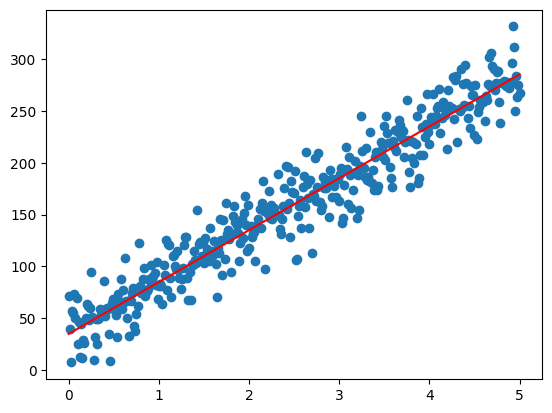

In [68]:
plt.scatter(x, y)
plt.plot(x, y0, color = 'red')

In [69]:
np_method = np.polyfit(x,y,1) #Отримаємо значення за допомогою polyfit
print("Expected k with numpy method: %s" % (np_method[0]))
print("Expected b with numpy method: %s" % (np_method[1]))

Expected k with numpy method: 49.48366213401874
Expected b with numpy method: 36.978957476821456


In [70]:
mx = x.sum()/n #Математичне очікування для х
my = y.sum()/n #Математичне очікування для у
a11 = np.dot(x.T, y)/n #Перший змішаний початковий момент
a2 = np.dot(x.T, x)/n #Другий початковий момент

In [71]:
#Знаходимо k та b за допомогою методу найменших квадратів
k0 = (a11 - mx*my)/(a2 - mx**2)
b0 = my - k0*mx
print("Expected k with this method: %s" % (k0))
print("Expected b with this method: %s" % (b0))

Expected k with this method: 49.483662134018765
Expected b with this method: 36.978957476821364


In [72]:
#Знайдемо різницю між значеннями, отриманими за допомогою різних методів.
print((k0/np_method[0])*100)
print((np_method[1]/b0)*100)

100.00000000000004
100.00000000000024


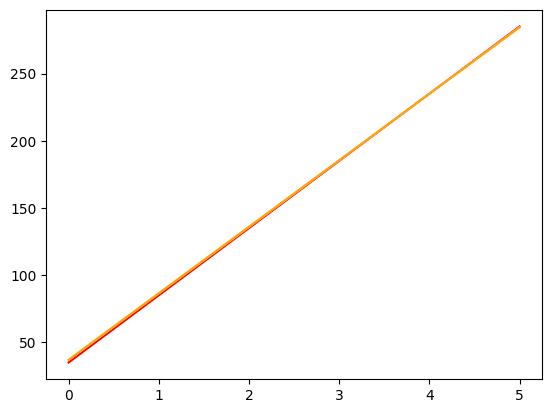

In [90]:
#Побудуємо графіки початкової функції, отриманої за допомогою polyfit та за допомогою методу найменших квадратів.
y1 = k0*x+b0
y2 = np_method[0]*x + np_method[1]
plt.plot(x, y0, color = 'red')
plt.plot(x, y1, color = 'pink')
plt.plot(x, y2, color = 'orange')

In [367]:
#Знайдемо частинну похідну за k
def dfdk(y, k, b):
    ff = np.array([k*x + b for x in range(n)])
    return -2*np.dot((y4 - ff).T, range(n))
#Знайдемо частинну похідну за b
def dfdb(y, k, b):
    ff = np.array([k*x + b for x in range(n)])
    return -2*(y4 - ff).sum()

n_iter = 145 #Кількість ітераціій
sigma = 3 #Стандартне відхилення
k_start, b_start = 2, 2 #Початкові значення коефіцієнтів
learning_rate1, learning_rate2 = 0.000001, 0.00001 #Коефіцієнт навчання

In [365]:
#Алгоритм пошуку коефіцієнтів
for n in range(n_iter):
    k_start = k_start - learning_rate1 * dfdk(y0, k_start, b_start)
    b_start = b_start - learning_rate2 * dfdb(y0, k_start, b_start)
    print(k_start, b_start)

2.0 2.0
2.0 2.0005581632438756
2.000051815208061 2.0016344663687926
2.0001992538562736 2.003188846077206
2.000478107957338 2.005181186572067
2.0009161388910046 2.0075713014450094
2.0015330558424966 2.0103189124353364
2.0023404862441496 2.013383627490502
2.003341938507713 2.0167249205755433
2.0045327584804724 2.020302115698614
2.005900082215166 2.024074377640236
2.007422788811635 2.0280007118920933
2.0090714582649665 2.032039976322836
2.010808340435145 2.0361509070882953
2.0125873424276897 2.04029216128535
2.014354042829385 2.044422378805156
2.016045742358761 2.0485002657642863
2.0175915615420434 2.0524847017724164
2.018912596979892 2.0563348731227795
2.0199221485894947 2.060010433756452
2.0205260308442705 2.063471695543252
2.0206229814364827 2.066679849030477
2.0201051808966834 2.0695972153264233
2.018858896452774 2.07218752920046
2.016765262731097 2.0744162527891814
2.013701210720925 2.07625091849535
2.0095405546713923 2.0776614987531326
2.004155244200265 2.0786207993141597
1.99741678

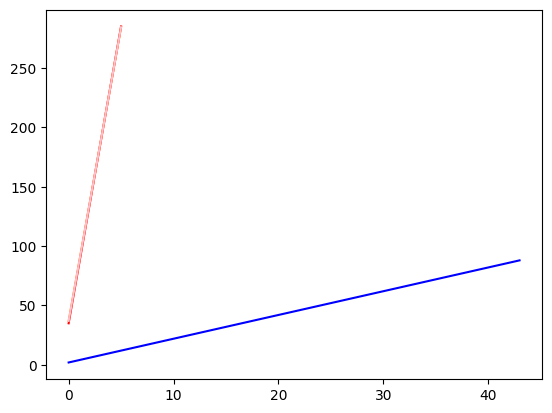

In [368]:
#Створимо функцію з отриманими коефіцієнтами
ff = np.array([k_start*x+b_start for x in range(n)])
#Побудуємо всі отримані графіки
plt.plot(ff, color = 'blue')
plt.plot(x, y2, color = 'orange')
plt.plot(x, y0, color = 'red')
plt.plot(x, y1, color = 'pink')